In [4]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Cell 2: Load the dataset
df = pd.read_csv('../data/raw/data.csv')

# Cell 3: Display the shape, columns, and data types
print("Shape of the dataset:", df.shape)
print("\nColumns in the dataset:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)
df.head()

Shape of the dataset: (95662, 16)

Columns in the dataset:
 ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']

Data types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
# Summary statistics for categorical columns
df.describe(include='object')

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


In [5]:
# Summary statistics for numerical columns
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


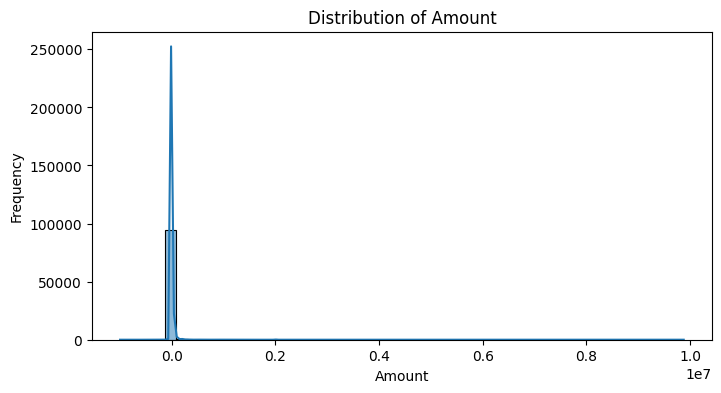

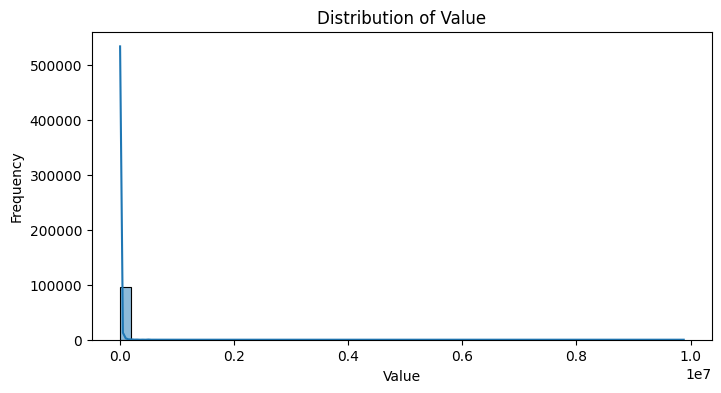

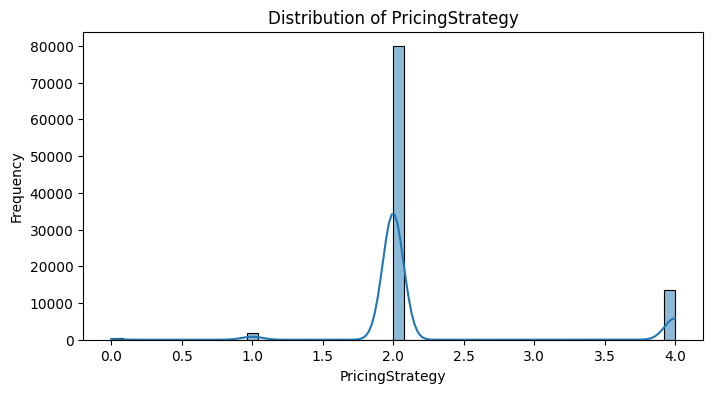

In [9]:
num_cols = ['Amount', 'Value', 'PricingStrategy']

# Histograms for numerical features
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

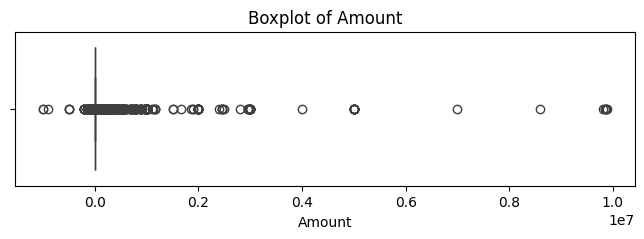

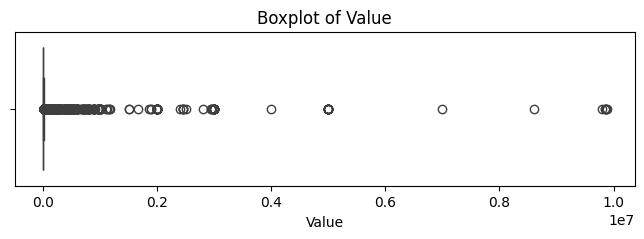

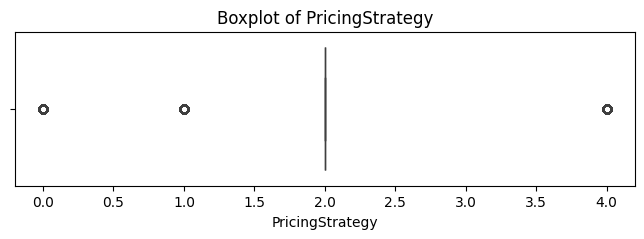

In [10]:
# Boxplots for outlier detection
for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

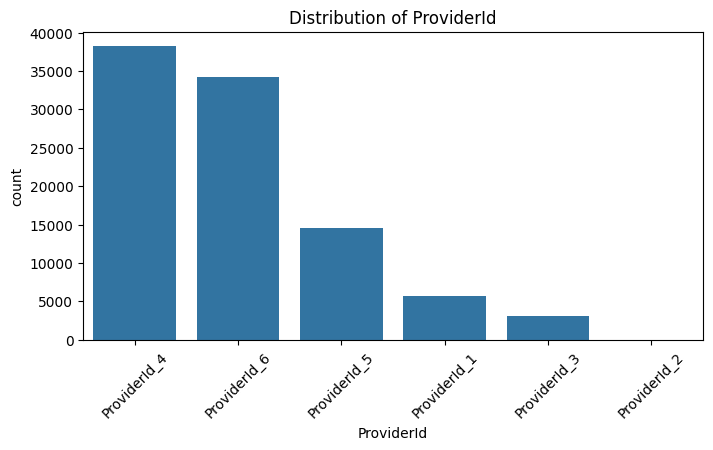

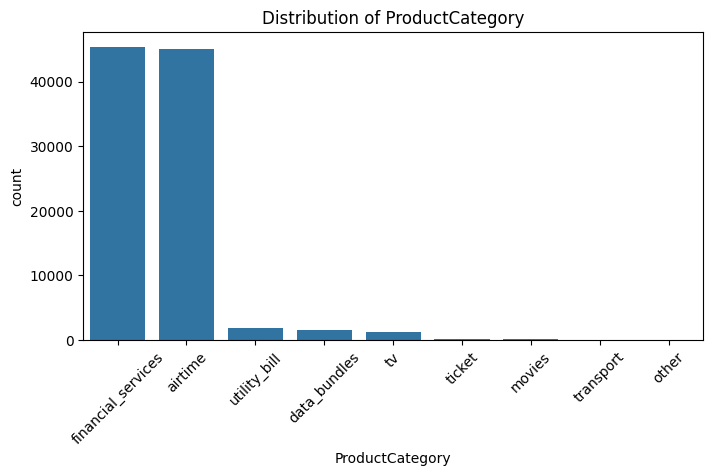

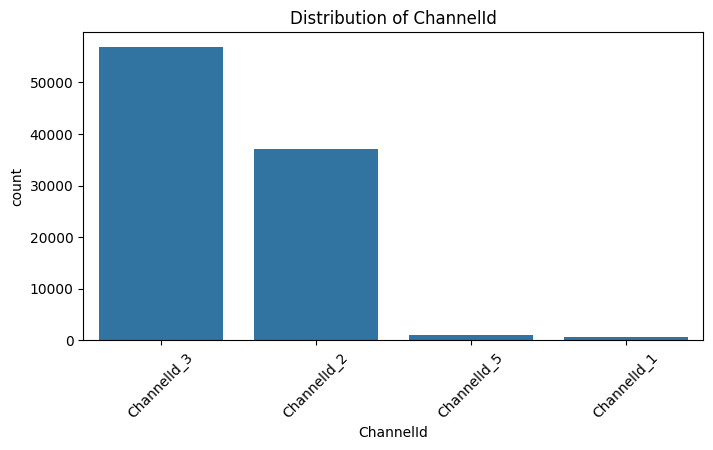

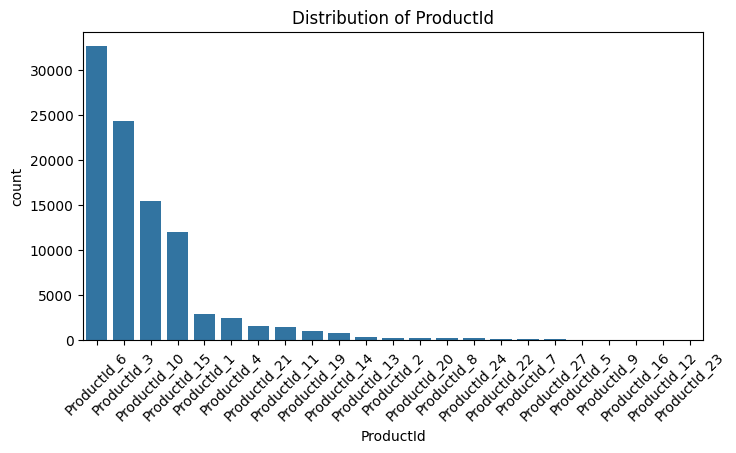

In [11]:
categorical_cols = ['ProviderId', 'ProductCategory', 'ChannelId', 'ProductId']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

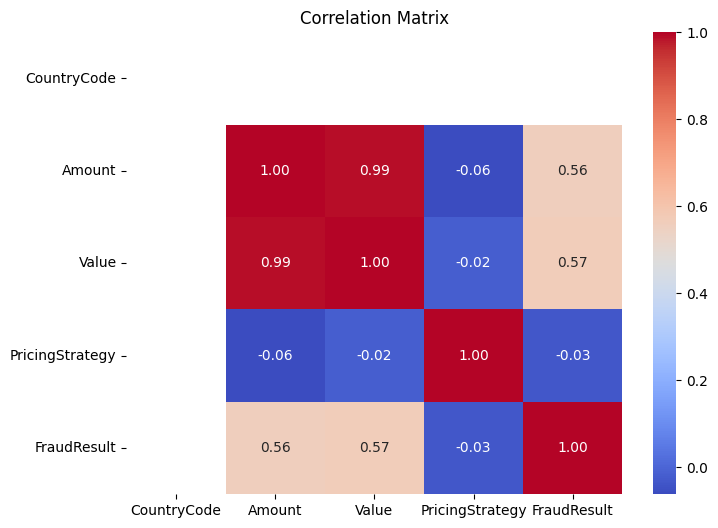

In [12]:
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Missing values per column:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


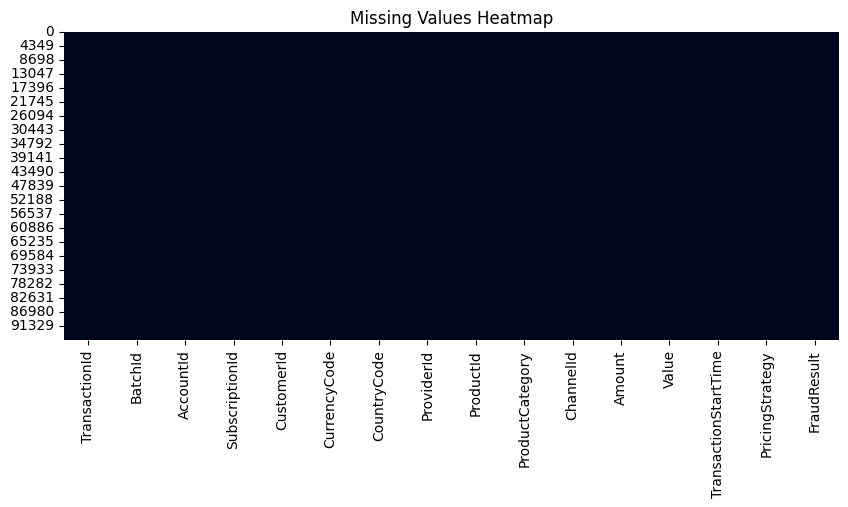

In [6]:
# Check missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

# Visualize missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:


##### Top Insights from Exploratory Data Analysis (EDA)

1. Severe Imbalance in Categorical Features
   - A few providers, product categories, channels, and products dominate the dataset.
   - This could bias models and affect generalization to rare categories.

2. Highly Skewed Numerical Features with Outliers
   - `Amount` and `Value` are highly right-skewed with many extreme outliers and some negative values.
   - Most transactions are for small amounts, but a few are extremely large.

3. Strong Correlation Between Amount and Value
   - These two features are almost perfectly correlated, so only one may be needed for modeling to avoid redundancy.

4. Moderate Correlation Between Transaction Value and Fraud
   - Higher transaction amounts/values are moderately associated with a higher likelihood of fraud.

5. No Missing Data
   - The dataset is complete, with no missing values in any column.
